<a href="https://colab.research.google.com/github/IbrahemAmar/Data-mining-and-Machine-Learning-/blob/main/lab9_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running the example, the accuracy on the training and validation test is printed
each epoch and at the end of the classification error rate is printed.

Note: Your results may vary given the stochastic nature of the algorithm or
evaluation procedure, or differences in numerical precision. Consider running the example
a few times and compare the average outcome.

In [96]:
import numpy as np
import random
# Simple ANN for the FaSion_MNIST Dataset
from keras.datasets import fashion_mnist,mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [97]:
# plot data samples
def plotSamples(data,rows,cols,tLabels,names,pLabels=[]):
    fig, axs = plt.subplots(rows,cols)
    nDigits = data.shape[0]
    for i in range(rows):
        for j in range(cols):
            index = random.randint(0,nDigits-1)
            axs[i,j].imshow(data[index],cmap = 'gray')
            # remove axes titles
            axs[i,j].axis('off')
            if (np.any(pLabels)):
                axs[i,j].set_title('P: %s, T: %s' % (
                    names[pLabels[index]], names[tLabels[index]]) ,fontdict={'fontsize': 10})
            else:
                axs[i,j].set_title('T: %s' % names[tLabels[index]],fontdict={'fontsize': 10})
            # show the figure
    plt.show()

In [98]:
# define a simple ANN model
def baseline_model(nClasses):
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(50, activation="relu"))

    ##NEW layer added
    model.add(Dense(32, activation="relu"))

    model.add(Dense(nClasses, activation="softmax"))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

In [99]:
def plotTrainingCurves(history,numEpochs):
  #Process ploting
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['val_loss'])
  plt.axis([0,numEpochs,0,1])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Accuracy','loss','val_accuracy','val_loss'], loc='lower left')
  plt.show()

In [100]:
# load data
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainData.shape, trainLabels.shape))
print('Test: X=%s, y=%s' % (testData.shape, testLabels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [101]:
names = ["0", "1", "2", "3", "4",
               "5", "6", "7", "8", "9"]

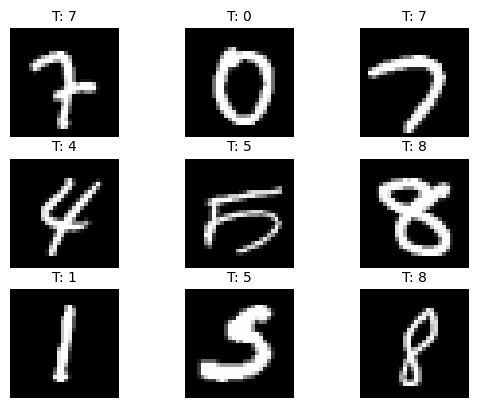

In [102]:
# plot random 9 images
rows = 3
cols = 3

plotSamples(trainData,rows,cols,trainLabels,names)

In [103]:
# encode outputs
catTrainLabels = to_categorical(trainLabels)
catTestLabels = to_categorical(testLabels)

In [104]:
XtrainData = trainData/255.0
XtestData = testData/255.0

In [105]:
# build the model
nClasses = catTestLabels.shape[1]
model = baseline_model(nClasses)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,212 (160.98 KB)

 Trainable params: 41,212 (160.98 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Fit the model
numEpochs = 10
history=model.fit(XtrainData, catTrainLabels, validation_data=(XtestData, catTestLabels),
                  epochs=numEpochs, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7320 - loss: 0.9090 - val_accuracy: 0.9335 - val_loss: 0.2293
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9385 - loss: 0.2120 - val_accuracy: 0.9504 - val_loss: 0.1644
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9543 - loss: 0.1538 - val_accuracy: 0.9573 - val_loss: 0.1465
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9636 - loss: 0.1227 - val_accuracy: 0.9581 - val_loss: 0.1313
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9684 - loss: 0.1073 - val_accuracy: 0.9638 - val_loss: 0.1173
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.0878 - val_accuracy: 0.9657 - val_loss: 0.1108
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9759 - loss: 0.0782 - val_accuracy: 0.9698 - val_loss: 0.0980
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9787 - loss: 0.0712 - val_accuracy: 0.

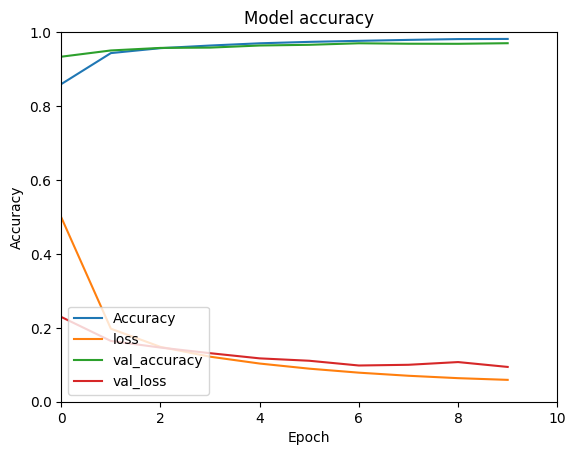

In [107]:
plotTrainingCurves(history,numEpochs)

In [108]:
# Final evaluation of the model
scores = model.evaluate(XtestData, catTestLabels, verbose=0)
print("ANN validation accuracy: %.2f" % (scores[1]))

ANN validation accuracy: 0.97


In [109]:
#make  predictions
predLabels = model.predict(testData).argmax(1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


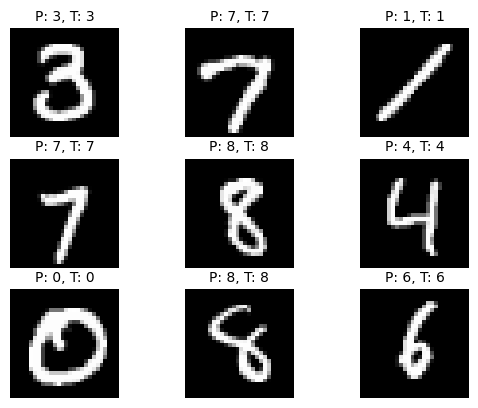

In [110]:
# plot random 9 images
plotSamples(XtestData,rows,cols,testLabels,names,predLabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


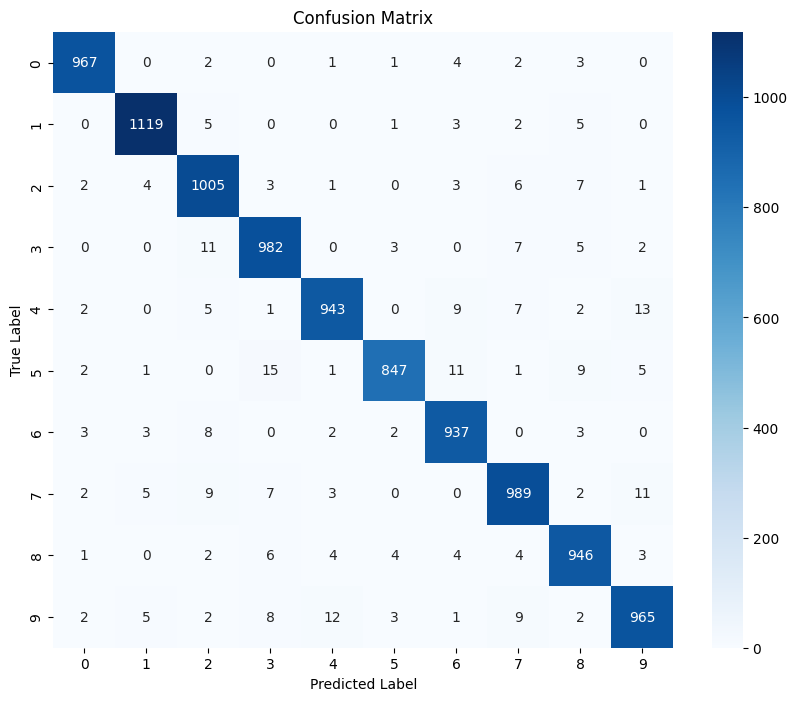

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Run prediction on the test set
# Use 'XtestData' as defined in your validation_data
y_pred_probs = model.predict(XtestData)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert 'catTestLabels' to class indices
# We use argmax because the labels are categorical (one-hot encoded)
y_true = np.argmax(catTestLabels, axis=1)

# 2. Calculate the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()